In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
import os   

path = os.listdir('/kaggle/input/brain-tumor-classification-mri/Training/')
classes = {'glioma_tumor':0, 'meningioma_tumor':1}

In [6]:
import cv2
X = []
Y = []
for cls in classes:
    pth = '/kaggle/input/brain-tumor-classification-mri/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [7]:
X = np.array(X)
Y = np.array(Y)
X_updated = X.reshape(len(X), -1)

In [8]:
np.unique(Y)

array([0, 1])

In [9]:
pd.Series(Y).value_counts()

0    826
1    822
dtype: int64

In [10]:
X.shape, X_updated.shape

((1648, 200, 200), (1648, 40000))

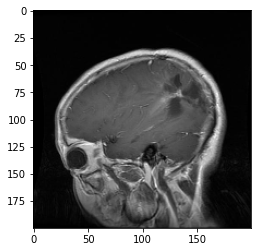

In [11]:
plt.imshow(X[0], cmap='gray')

In [12]:
X_updated = X.reshape(len(X), -1)
X_updated.shape


(1648, 40000)

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.75)

In [14]:
xtrain.shape, xtest.shape

((412, 40000), (1236, 40000))

In [15]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [16]:
from sklearn.decomposition import PCA

In [17]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(412, 40000) (1236, 40000)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [19]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [20]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [21]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.7580906148867314


In [22]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.941747572815534
Testing Score: 0.7597087378640777


In [23]:
pred = sv.predict(xtest)

In [24]:
misclassified=np.where(ytest!=pred)
misclassified

(array([   3,    9,   13,   15,   18,   19,   22,   26,   31,   33,   41,
          45,   47,   51,   58,   61,   64,   66,   67,   68,   69,   75,
          76,   81,   86,   91,   94,   96,   98,  103,  107,  119,  123,
         125,  126,  128,  134,  136,  137,  138,  139,  143,  150,  152,
         159,  161,  164,  167,  176,  182,  184,  188,  206,  208,  209,
         213,  214,  215,  218,  225,  226,  235,  242,  244,  249,  251,
         253,  256,  257,  264,  266,  275,  287,  290,  292,  294,  298,
         300,  308,  309,  313,  318,  321,  327,  331,  336,  342,  343,
         346,  348,  349,  362,  366,  372,  378,  389,  391,  395,  407,
         408,  411,  415,  417,  418,  422,  425,  427,  430,  435,  436,
         437,  448,  450,  452,  453,  455,  466,  469,  470,  471,  472,
         487,  503,  504,  508,  512,  514,  517,  520,  528,  534,  540,
         546,  553,  558,  566,  568,  570,  574,  580,  584,  586,  587,
         588,  591,  597,  607,  608, 

In [25]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  297
1 1


In [26]:
dec = {0:'glioma_tumor', 1:'meningioma_tumor'}

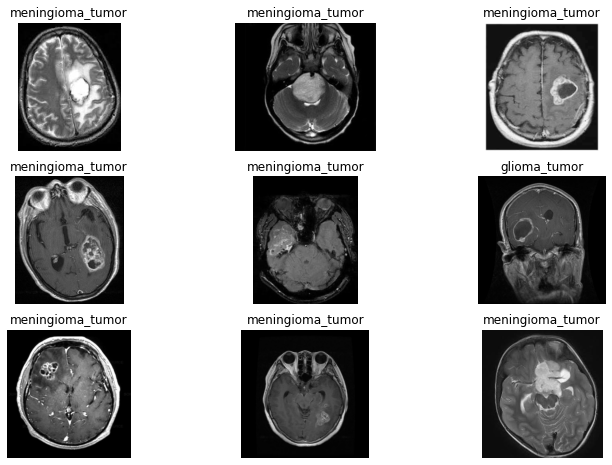

In [27]:
plt.figure(figsize=(12,8))
p = os.listdir('/kaggle/input/brain-tumor-classification-mri/Testing/')
c=1
for i in os.listdir('/kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

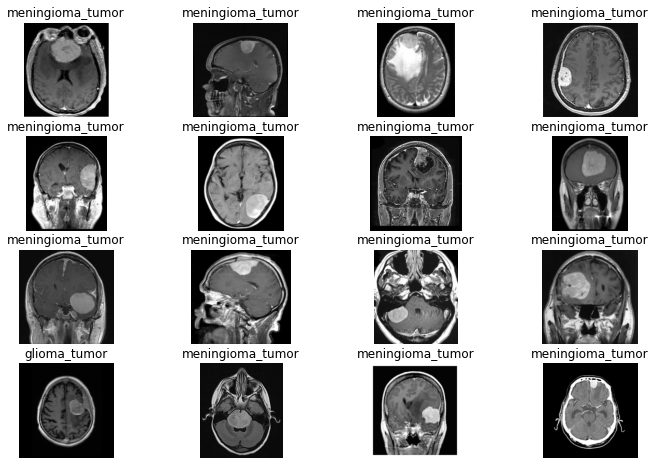

In [28]:
plt.figure(figsize=(12,8))
p = os.listdir('/kaggle/input/brain-tumor-classification-mri/Testing/')
c=1
for i in os.listdir('/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1